In [1]:
from viawind import CalcVisualImpact

In [2]:
via = CalcVisualImpact(windturbine_fpath=r"G:/demo_folder/datasets/tx_aoi.shp", 
                       dem_fpath=r"G:/demo_folder/datasets/USGS_13_n29w098_20211103.tif",
                      dir_path=r"G:/demo_folder/")

Please format data as in US Wind Turbine database: https://eerscmap.usgs.gov/uswtdb/data/
Suggested to use a Digital Surface Model (DSM) instead of a Digital Elevation Model (DEM)


In [4]:
gdf = via.read_windturbine_file()

In [5]:
raster = via.read_dem()

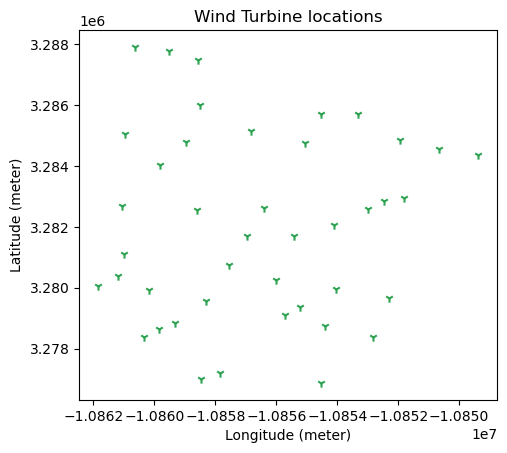

In [3]:
via.visualize_wind_turbines()

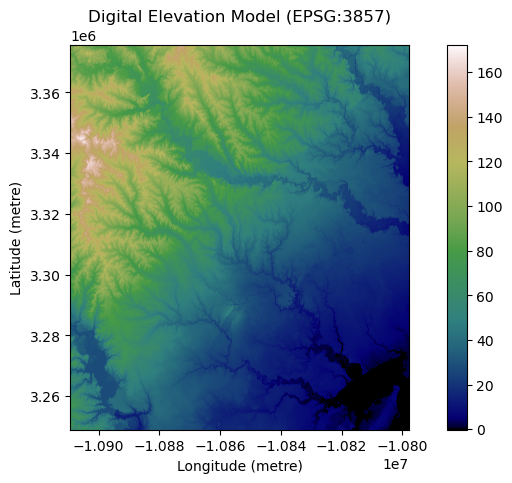

In [5]:
via.visualize_dem()

In [3]:
via.create_turbine_multiringbuffer_raster()

['raster_buffers\\rasterized_1_turbine_buffer.tif',
 'raster_buffers\\rasterized_2_turbine_buffer.tif',
 'raster_buffers\\rasterized_3_turbine_buffer.tif',
 'raster_buffers\\rasterized_4_turbine_buffer.tif',
 'raster_buffers\\rasterized_5_turbine_buffer.tif',
 'raster_buffers\\rasterized_6_turbine_buffer.tif',
 'raster_buffers\\rasterized_7_turbine_buffer.tif',
 'raster_buffers\\rasterized_8_turbine_buffer.tif',
 'raster_buffers\\rasterized_9_turbine_buffer.tif',
 'raster_buffers\\rasterized_10_turbine_buffer.tif',
 'raster_buffers\\rasterized_11_turbine_buffer.tif',
 'raster_buffers\\rasterized_12_turbine_buffer.tif',
 'raster_buffers\\rasterized_13_turbine_buffer.tif',
 'raster_buffers\\rasterized_14_turbine_buffer.tif',
 'raster_buffers\\rasterized_15_turbine_buffer.tif',
 'raster_buffers\\rasterized_16_turbine_buffer.tif',
 'raster_buffers\\rasterized_17_turbine_buffer.tif',
 'raster_buffers\\rasterized_18_turbine_buffer.tif',
 'raster_buffers\\rasterized_19_turbine_buffer.tif',
 '

In [3]:
via.perform_viz_prominence()

In [4]:
via.reclass_viz_prominence_rasters()

Reclassification complete for visual prominence and output saved to visual_exposure


In [5]:
via.reclass_meaningful_visibility_rasters()

Reclassification complete for meaningful visibility and output saved to visual_exposure


Created cumulative raster at cumulative_outputs/cumulative_visual_exposure.tif
Created cumulative raster at cumulative_outputs/cumulative_meaningful_visibility.tif


C:\Users\Sidrcs\Documents\Github\Visual_Impact_Assessment\viawind\wind.py:449: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  # Mean prominence value at the index is added to the mean prominence column


Created a visual prominence shapefile at cumulative_outputs


C:\Users\Sidrcs\anaconda3\envs\via\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


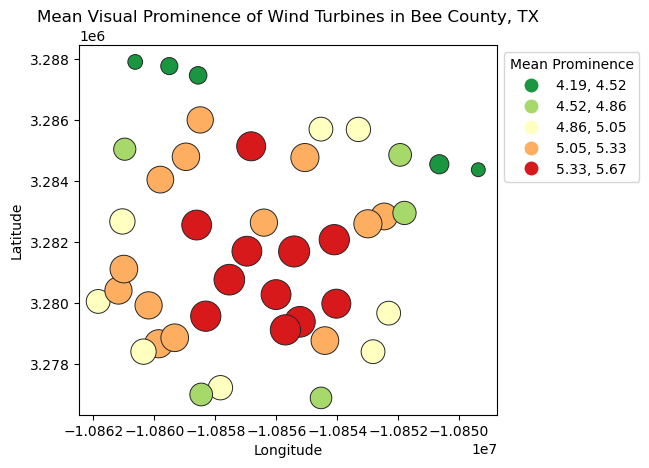

In [6]:
via.visualize_mean_prominence(county_state_title="Bee County, TX")

In [ ]:
%%time
via.run_via_pipeline(county_state_title="Bee County, TX")